## Feature Engineering

In this section, we will explore how to extract deeper insights from our dataset.  We want to see if we can create new features by combining existing ones or refining the data we already have. Our goal is to uncover hidden patterns that may potentially allow us to enhance our ability to identify phishing websites.

---

### Feature 1: Consonant-to-Vowel Ratio

Phishing URLs often appear visually unusual to the average person due to their reliance on obfuscation techniques. Threat actors use atypical combinations of letters and characters to disguise the true nature of their malicious websites.

Hence, we hypothsise that the unusual appearance of phishing URLs can be quantified by their **consonant-to-vowel ratio**. Since URLs often incorporate elements of natural English words, a significant deviation from standard language patterns could indicate suspicious activity.

In [28]:
# Open the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
malicious_urls = pd.read_csv('../datasets/filtered_malicious_urls.csv')

In [27]:
sampled_benign = malicious_urls[malicious_urls['type'] == 'benign'].sample(n=500, random_state=69)
sampled_phishing = malicious_urls[malicious_urls['type'] == 'phishing'].sample(n=500, random_state=69)

sampled_total = pd.concat([sampled_benign, sampled_phishing])
sampled_total['type'] = sampled_total['type'].astype('category')
sampled_total['type'] = sampled_total['type'].cat.codes

In [30]:
def countVowelsConsonants(s):
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    vowel_count = 0
    consonant_count = 0
    s = s.lower()

    for char in s:
        if char in vowels:
            vowel_count += 1
        elif char in consonants:
            consonant_count += 1
    
    return vowel_count, consonant_count

def calculateRatio(df):
    counts = df['url'].apply(lambda x: countVowelsConsonants(x))
    df['vowel_count'], df['consonant_count'] = zip(*counts)
    df['consonant_vowel_ratio'] = df.apply(lambda row: row['consonant_count'] / row['vowel_count'] if row['vowel_count'] > 0 else 0, axis=1)
    
    return df

def displayBoxPlot(numerical_data, df):
    plt.figure(figsize=(6, 6))
    sb.boxplot(x='type', y=numerical_data, data=df)
    plt.title(f'Box Plot of `{numerical_data}` by Website Status')
    plt.xlabel('Website Status')
    plt.ylabel(numerical_data)
    plt.xticks([0, 1], ['Benign', 'Phishing'])
    plt.show()

      count      mean       std       min  25%       50%       75%        max
type                                                                         
0     500.0  1.951775  0.570400  0.655172  1.6  1.833333  2.231900   5.047619
1     500.0  2.412679  1.128596  0.000000  1.8  2.222222  2.778986  11.000000


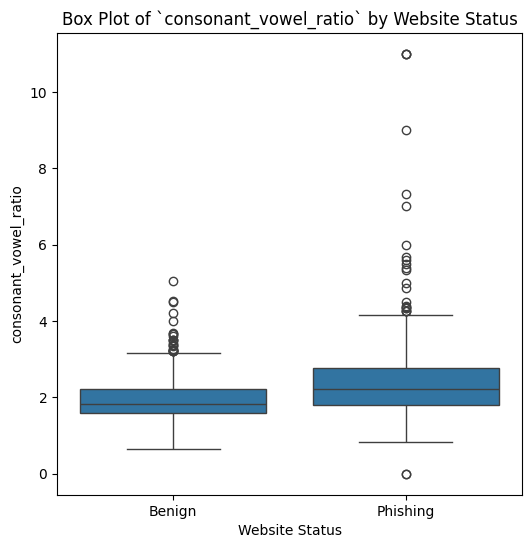

In [31]:
sampled_processed = calculateRatio(sampled_total)
summary_statistics = sampled_processed.groupby('type')['consonant_vowel_ratio'].describe()
print(summary_statistics)
displayBoxPlot('consonant_vowel_ratio', sampled_processed)

In conclusion, our analysis suggests a weak correlation between the consonant-to-vowel ratio and the likelihood of a website being a phishing attempt. While phishing websites tend to exhibit slightly higher ratios, this could also be attributed to longer URL lengths (as shown in our Exploratory Analysis), which naturally contain more consonants.  

In a world of evolving cyber threats, it's likely that threat actors are employing sophisticated obfuscation techniques, crafting more believable URLs that mimic natural language. This trend underscores the unfortunate reality of why phishing scams remain so successful.